## Analysis

#### Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,pathlib,sys,warnings
warnings.filterwarnings('ignore')
sys.path.append("/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate")
from tqdm import tqdm
import json
import functions.software_commands as software_commands
import functions.statistics as statistics
import defaults

### Stored Videos

In [2]:
# Path
stored_videos_path = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/framerate_switching_bitrates/stored_videos"

File2Metadata = {}
	
for resolution in [(1920,1080)]:
    resolution_string = "{}x{}".format(resolution[0], resolution[1])
    File2Metadata[resolution_string] = {}
    
    for fps in [30,20,10]:
        File2Metadata[resolution_string][int(fps)] = {}
        
        for bitrate in reversed([3, 2.75, 2.5, 2.25, 2, 1.75, 1.5, 1.25, 1, 0.75]):
            File2Metadata[resolution_string][int(fps)][bitrate] = {}

            for video_file in os.listdir(stored_videos_path):
                File2Metadata[resolution_string][int(fps)][bitrate][os.path.splitext(video_file)[0]] = {}


# Information to Mode
Info2Mode = {}
Mode2Info = {}
for i,complexity in enumerate([(False, False), (True, False), (False, True), (True, True)]):
	Info2Mode[complexity] = i
	Mode2Info[i] = complexity

### Simulated Compressed Videos

In [3]:
# Compressed videos for different gop_size, resolution, fps and bitrates
# Paths
compressed_videos_segments_dir = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/framerate_switching_bitrates/gop_size=10/compressed_videos_segments"
quality_scores = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/framerate_switching_bitrates/gop_size=10/compressed_videos_segments_quality_scores"

for resolution in [(1920,1080)]:
    resolution_string = "{}x{}".format(resolution[0], resolution[1])
    
    for fps in [30,20,10]:
        for bitrate in [3, 2.75, 2.5, 2.25, 2, 1.75, 1.5, 1.25, 1, 0.75]:
            # For each compressed video
            compressed_videos_setting_dir = os.path.join(compressed_videos_segments_dir, resolution_string, str(int(fps)), str(bitrate))
            quality_dir = os.path.join(quality_scores, resolution_string, str(int(fps)), str(bitrate))
            
            for video_file in os.listdir(compressed_videos_setting_dir):	
                filemetadata = os.path.splitext(video_file)[0].split("_")
                original_filename = "_".join(filemetadata[:2])
                part = int(filemetadata[-1])
                mode = int(filemetadata[0][-1])
                
                resolution, fps, b, q = statistics.get_statistics(
                    video_path=os.path.join(compressed_videos_setting_dir, video_file),
                    quality_dir=quality_dir
                )

                scene_complexity, vehicle_info = Mode2Info[mode]

                File2Metadata[resolution_string][int(fps)][bitrate][original_filename][part] = [fps, b, q, scene_complexity, vehicle_info]

#### Rate-Quality Curves

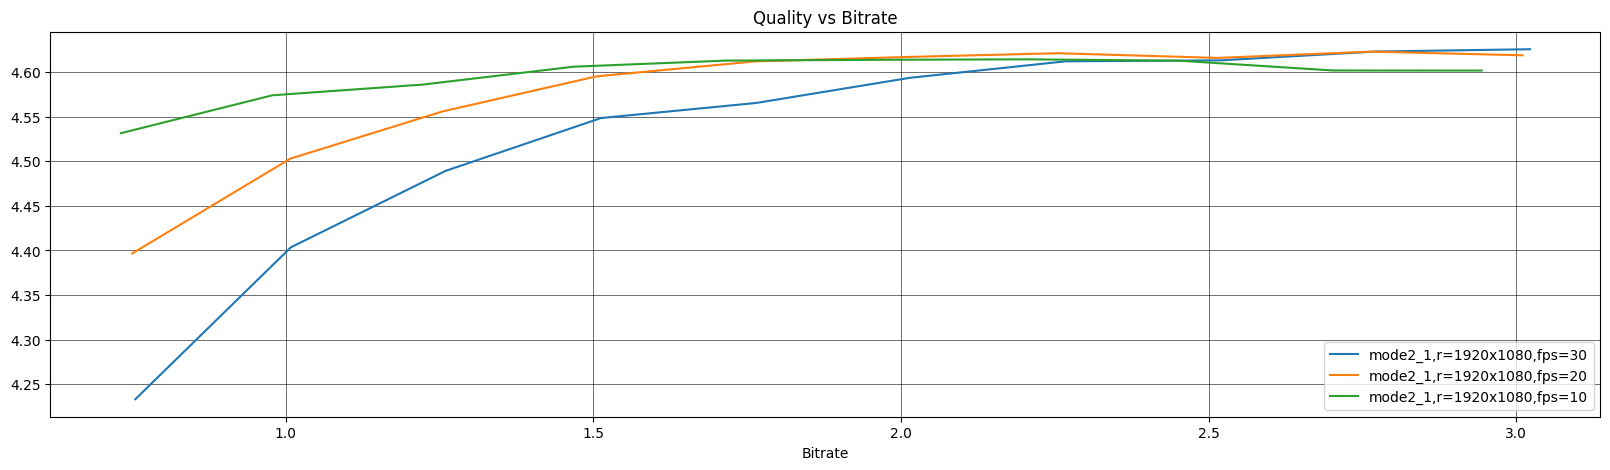

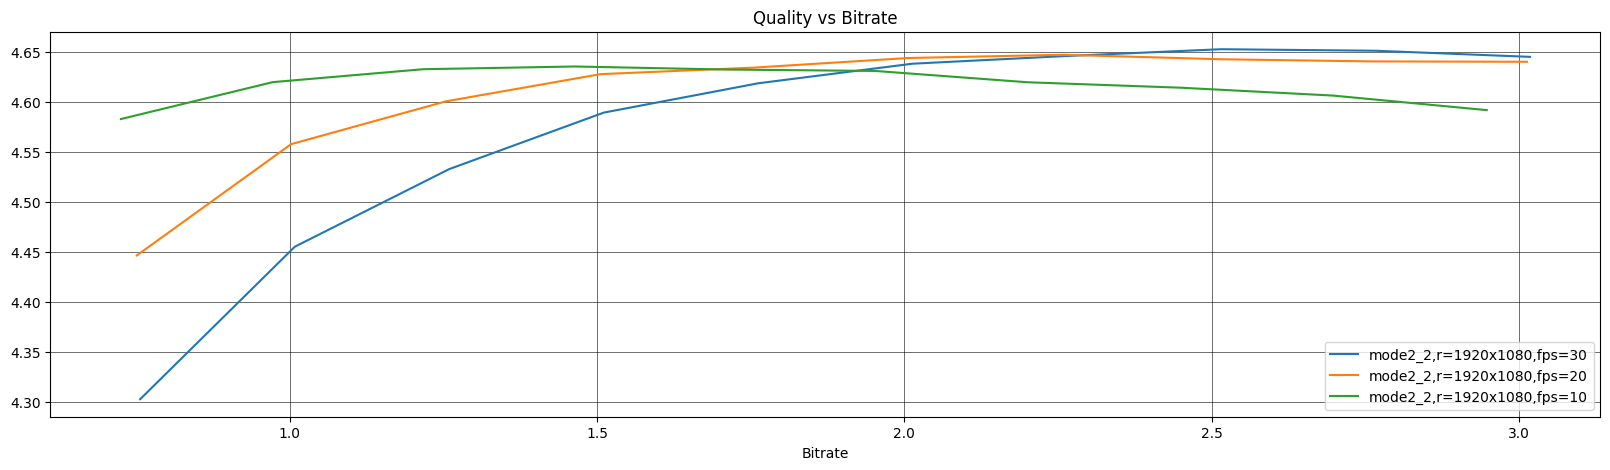

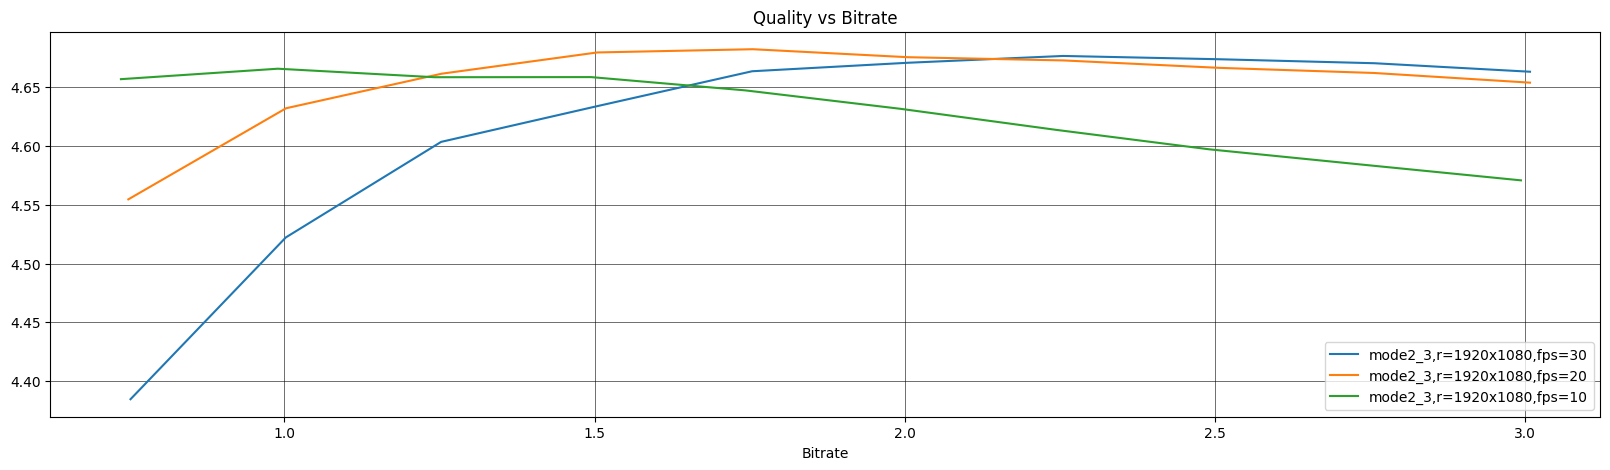

In [4]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Setting
scene_complexity = False
vehicle_info = True

for filenum in [1,2,3]:
	original_filename = "mode{}_{}".format(Info2Mode[(scene_complexity, vehicle_info)], filenum)

	# Settings
	settings = [(10, "1920x1080", 30), (10, "1920x1080", 20), (10, "1920x1080", 10)]

	# Plotting Seperately
	plt.figure(figsize=(20,5))
	plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
	plt.grid(which='minor', linestyle='-', linewidth='0.4', color='black')
	plt.title("Quality vs Bitrate")
	plt.xlabel("Bitrate")
	plt.ylabel("")

	for setting in settings:
		gop_size = setting[0]
		resolution_string = setting[1]
		fps = setting[2]

		Bitrate = []
		Quality = []
		
		for bitrate in [3, 2.75, 2.5, 2.25, 2, 1.75, 1.5, 1.25, 1, 0.75]:
			data = File2Metadata[resolution_string][int(fps)][bitrate][original_filename]
			data = dict(sorted(data.items()))

			metadata = np.asarray(list(data.values()))
			Quality.append(np.mean(metadata[:, 2]))
			Bitrate.append(np.mean(metadata[:, 1]))
		
		# plt.scatter(Bitrate, Quality)
		plt.plot(Bitrate, Quality, label="{},r={},fps={}".format(original_filename,resolution_string,fps))

	plt.legend()

	plt.show()